In [1]:
from smolagents import LiteLLMModel, CodeAgent
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
llm_model = LiteLLMModel(model_id="o4-mini-2025-04-16", api_key=api_key)

import pandas as pd

pd.set_option("max_colwidth", None)
OUTPUT_DIR = "output"


c:\Users\wbrya\OneDrive\Documents\GitHub\LLM-Stuff\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
system_prompt = """
## Bank Churn Prediction Agent 🏦🔍

You are an autonomous data analysis agent focused on predicting customer churn using the BankChurners.csv dataset:

1. Load and clean the BankChurners.csv data, handling missing or invalid values.
2. Compute descriptive statistics and summary tables for churn-related features.
3. Detect outliers, anomalies, and class imbalance issues.
4. Generate visualizations (histograms, boxplots, scatter plots, correlation heatmaps) to explore churn factors and feature relationships.
5. Build and evaluate churn prediction models using scikit-learn (e.g., logistic regression, random forest), including train/test splits and cross-validation.
6. Provide clear performance metrics (accuracy, precision, recall, F1-score, ROC-AUC) and visualizations (ROC curves, confusion matrices).
7. Suggest feature engineering steps to improve model performance.
8. Export the trained model and evaluation results to the output directory.

Use pandas, numpy, matplotlib, seaborn, and scikit-learn libraries as needed.
Ensure all generated artifacts (plots, cleaned data, model files, evaluation reports) are saved under the path provided in `OUTPUT_DIR='output'`.
You must include a final prediction summary and at least one visualization image.

User Query:
{query}
"""
agent = CodeAgent(
   tools=[],
   model=llm_model,
   additional_authorized_imports=["*"],  # authorize all imports, including sklearn submodules
   #executor_type="docker"
   )

Caution: you set an authorization for all imports, meaning your agent can decide to import any package it deems 
necessary. This might raise issues if the package is not installed in your environment.

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ ## Bank Churn Prediction Agent 🏦🔍                                                                             │
│                                                                                                                 │
│ You are an autonomous data analysis agent focused on predicting customer churn using the BankChurners.csv       │
│ dataset:                                                                                                        │
│                                                                                                                 │
│ 1. Load and clean the BankChurners.csv data, handling missing or invalid values.                                │
│ 2. Compute descriptive statistics and summary tables for churn-related features.                                │
│ 3. Detect outliers, anomalies, and class imbalance issues.                                                      │
│ 4. Generate visualizations (histograms, boxplots, scatter plots, correlation heatmaps) to explore churn factors │
│ and feature relationships.                                                                                      │
│ 5. Build and evaluate churn prediction models using scikit-learn (e.g., logistic regression, random forest),    │
│ including train/test splits and cross-validation.                                                               │
│ 6. Provide clear performance metrics (accuracy, precision, recall, F1-score, ROC-AUC) and visualizations (ROC   │
│ curves, confusion matrices).                                                                                    │
│ 7. Suggest feature engineering steps to improve model performance.                                              │
│ 8. Export the trained model and evaluation results to the output directory.                                     │
│                                                                                                                 │
│ Use pandas, numpy, matplotlib, seaborn, and scikit-learn libraries as needed.                                   │
│ Ensure all generated artifacts (plots, cleaned data, model files, evaluation reports) are saved under the path  │
│ provided in `OUTPUT_DIR='output'`.                                                                              │
│ You must include a final prediction summary and at least one visualization image.                               │
│                                                                                                                 │
│ User Query:                                                                                                     │
│ {query}                                                                                                         │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'input_csv': 'BankChurners.csv'}.                                                                              │
│                                                                                                                 │
╰─ LiteLLMModel - o4-mini-2025-04-16 ─────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import os                                                                                                        
  import pandas as pd                                                                                              
  import numpy as np                                                                                               
                                                                                                                   
  # Setup output directory                                                                                         
  OUTPUT_DIR = 'output'                                                                                            
  os.makedirs(OUTPUT_DIR, exist_ok=True)                                                                           
                                                                                                                   
  # Load data                                                                                                      
  df = pd.read_csv(input_csv)                                                                                      
  # Basic info                                                                                                     
  print("Initial shape:", df.shape)                                                                                
  print("Missing values per column:\n", df.isnull().sum())                                                         
                                                                                                                   
  # Remove duplicates                                                                                              
  df_clean = df.drop_duplicates()                                                                                  
  print("Shape after removing duplicates:", df_clean.shape)                                                        
                                                                                                                   
  # Drop unique ID column                                                                                          
  if 'CLIENTNUM' in df_clean.columns:                                                                              
      df_clean = df_clean.drop(columns=['CLIENTNUM'])                                                              
                                                                                                                   
  # Encode churn flag                                                                                              
  df_clean['Churn'] = df_clean['Attrition_Flag'].map({                                                             
      'Existing Customer': 0,                                                                                      
      'Attrited Customer': 1                                                                                       
  })                                                                                                               
  df_clean = df_clean.drop(columns=['Attrition_Flag'])                                                             
  print("Churn value counts:\n", df_clean['Churn'].value_counts())                                                 
                                                                                                                   
  # Descriptive statistics                                                                                         
  desc = df_clean.describe(include='all')                                                                          
  desc.to_csv(os.path.join(OUTPUT_DIR, 'descriptive_statistics.csv'))                                              
                                                         

c:\Users\wbrya\OneDrive\Documents\GitHub\LLM-Stuff\.venv\Lib\site-packages\smolagents\local_python_executor.py:838: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  return func(*args, **kwargs)
c:\Users\wbrya\OneDrive\Documents\GitHub\LLM-Stuff\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Execution logs:
Initial shape: (10127, 23)
Missing values per column:
 CLIENTNUM                                                                                                         
0
Attrition_Flag                                                                                                     
0
Customer_Age                                                                                                       
0
Gender                                                                                                             
0
Dependent_count                                                                                                    
0
Education_Level                                                                                                    
0
Marital_Status                                                                                                     
0
Income_Category                                                                                                    
0
Card_Category                                                                                                      
0
Months_on_book                                                                                                     
0
Total_Relationship_Count                                                                                           
0
Months_Inactive_12_mon                                                                                             
0
Contacts_Count_12_mon                                                                                              
0
Credit_Limit                                                                                                       
0
Total_Revolving_Bal                                                                                                
0
Avg_Open_To_Buy                                                                                                    
0
Total_Amt_Chng_Q4_Q1                                                                                               
0
Total_Trans_Amt                                                                                                    
0
Total_Trans_Ct                                                                                                     
0
Total_Ct_Chng_Q4_Q1                                                                                                
0
Avg_Utilization_Ratio                                                                                              
0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_In
active_12_mon_1    0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_In
active_12_mon_2    0
dtype: int64
Shape after removing duplicates: (10127, 23)
Churn value counts:
 Churn
0    8500
1    1627
Name: count, dtype: int64
Outlier summary head:
                     feature  n_outliers  pct_outliers
0              Customer_Age           2      0.019749
1           Dependent_count           0      0.000000
2            Months_on_book         386      3.811593
3  Total_Relationship_Count           0      0.000000
4    Months_Inactive_12_mon         331      3.268490

Code execution failed at line 'with open(os.path.join(OUTPUT_DIR, 'metrics_summary.json'), 'w') as f:
    json.dump(metrics_summary, f, indent=4)' due to: InterpreterError: Forbidden function evaluation: 'open' is not
among the explicitly allowed tools or defined/imported in the preceding code

[Step 1: Duration 158.92 seconds| Input tokens: 2,151 | Output tokens: 5,065]

ActionStep(step_number=1, timing=Timing(start_time=1751904714.327831, end_time=1751904873.2498875, duration=158.9220564365387), model_input_messages=[ChatMessage(role=<MessageRole.SYSTEM: 'system'>, content=[{'type': 'text', 'text': 'You are an expert assistant who can solve any task using code blobs. You will be given a task to solve as best you can.\nTo do so, you have been given access to a list of tools: these tools are basically Python functions which you can call with code.\nTo solve the task, you must plan forward to proceed in a series of steps, in a cycle of \'Thought:\', \'<code>\', and \'Observation:\' sequences.\n\nAt each step, in the \'Thought:\' sequence, you should first explain your reasoning towards solving the task and the tools that you want to use.\nThen in the \'<code>\' sequence, you should write the code in simple Python. The code sequence must end with \'</code>\' sequence.\nDuring each intermediate step, you can use \'print()\' to save whatever important infor

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
  import os                                                                                                        
                                                                                                                   
  # Convert metrics_summary to a DataFrame and save as JSON                                                        
  metrics_df = pd.DataFrame(metrics_summary).T                                                                     
  metrics_df.to_json(                                                                                              
      os.path.join(OUTPUT_DIR, 'metrics_summary.json'),                                                            
      orient='index',                                                                                              
      indent=4                                                                                                     
  )                                                                                                                
                                                                                                                   
  # Final answer summary (re-issued to complete the workflow)                                                      
  final_answer({                                                                                                   
      'best_model': best_name,                                                                                     
      'metrics': metrics_summary,                                                                                  
      'feature_engineering_suggestions': feature_engineering_suggestions,                                          
      'artifacts': {                                                                                               
          'cleaned_data': 'output/cleaned_data.csv',                                                               
          'descriptive_stats': 'output/descriptive_statistics.csv',                                                
          'outlier_summary': 'output/outlier_summary.csv',                                                         
          'correlation_heatmap': 'output/correlation_heatmap.png',                                                 
          'confusion_matrix': 'output/confusion_matrix.png',                                                       
          'roc_curve': 'output/roc_curve.png',                                                                     
          'saved_model': f"output/{best_name}.joblib",                                                             
          'metrics_json': 'output/metrics_summary.json'                                                            
      }                                                                                                            
  })                                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'final_answer({
    'best_model': best_name,
    'metrics': metrics_summary,
    'feature_engineering_suggestions': feature_engineering_suggestions,
    'artifacts': {
        'cleaned_data': 'output/cleaned_data.csv',
        'descriptive_stats': 'output/descriptive_statistics.csv',
        'outlier_summary': 'output/outlier_summary.csv',
        'correlation_heatmap': 'output/correlation_heatmap.png',
        'confusion_matrix': 'output/confusion_matrix.png',
        'roc_curve': 'output/roc_curve.png',
        'saved_model': f"output/{best_name}.joblib",
        'metrics_json': 'output/metrics_summary.json'
    }
})' due to: InterpreterError: The variable `feature_engineering_suggestions` is not defined.

[Step 2: Duration 9.61 seconds| Input tokens: 8,334 | Output tokens: 5,814]

ActionStep(step_number=2, timing=Timing(start_time=1751904873.2520757, end_time=1751904882.8595824, duration=9.60750675201416), model_input_messages=[ChatMessage(role=<MessageRole.SYSTEM: 'system'>, content=[{'type': 'text', 'text': 'You are an expert assistant who can solve any task using code blobs. You will be given a task to solve as best you can.\nTo do so, you have been given access to a list of tools: these tools are basically Python functions which you can call with code.\nTo solve the task, you must plan forward to proceed in a series of steps, in a cycle of \'Thought:\', \'<code>\', and \'Observation:\' sequences.\n\nAt each step, in the \'Thought:\' sequence, you should first explain your reasoning towards solving the task and the tools that you want to use.\nThen in the \'<code>\' sequence, you should write the code in simple Python. The code sequence must end with \'</code>\' sequence.\nDuring each intermediate step, you can use \'print()\' to save whatever important infor

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import os                                                                                                        
  import pandas as pd                                                                                              
                                                                                                                   
  # Reload metrics summary                                                                                         
  OUTPUT_DIR = 'output'                                                                                            
  metrics_df = pd.read_json(                                                                                       
      os.path.join(OUTPUT_DIR, 'metrics_summary.json'),                                                            
      orient='index'                                                                                               
  )                                                                                                                
  metrics_summary = metrics_df.to_dict(orient='index')                                                             
                                                                                                                   
  # Determine best model by ROC-AUC                                                                                
  best_name = max(                                                                                                 
      metrics_summary,                                                                                             
      key=lambda model: metrics_summary[model]['roc_auc']                                                          
  )                                                                                                                
                                                                                                                   
  # Define feature engineering suggestions                                                                         
  feature_engineering_suggestions = [                                                                              
      "Scale numeric features (e.g., StandardScaler) for scale-sensitive models.",                                 
      "Create interaction or polynomial features to capture nonlinear effects.",                                   
      "Use target or frequency encoding for high-cardinality categoricals.",                                       
      "Apply dimensionality reduction (e.g., PCA) if feature space is large."                                      
  ]                                                                                                                
                                                                                                                   
  # Final answer with summary and artifact paths                                                                   
  final_answer({                                                                                                   
      'best_model': best_name,                                                                                     
      'metrics': metrics_summary,                                                                                  
      'feature_engineering_suggestions': feature_engineering_suggestions,                                          
      'artifacts': {                                                                                               
          'cleaned_data': 'output/cleaned_data.csv',                                                               
          'descriptive_stats': 'output/descriptive_statistics.csv',                                                
          'outlier_summary': 'output/outlier_summary.csv'

Out - Final answer: {'best_model': 'LogisticRegression', 'metrics': {'LogisticRegression': {'accuracy': 1, 
'precision': 1, 'recall': 1, 'f1_score': 1, 'roc_auc': 1}, 'RandomForest': {'accuracy': 1, 'precision': 1, 
'recall': 1, 'f1_score': 1, 'roc_auc': 1}}, 'feature_engineering_suggestions': ['Scale numeric features (e.g., 
StandardScaler) for scale-sensitive models.', 'Create interaction or polynomial features to capture nonlinear 
effects.', 'Use target or frequency encoding for high-cardinality categoricals.', 'Apply dimensionality reduction 
(e.g., PCA) if feature space is large.'], 'artifacts': {'cleaned_data': 'output/cleaned_data.csv', 
'descriptive_stats': 'output/descriptive_statistics.csv', 'outlier_summary': 'output/outlier_summary.csv', 
'correlation_heatmap': 'output/correlation_heatmap.png', 'confusion_matrix': 'output/confusion_matrix.png', 
'roc_curve': 'output/roc_curve.png', 'saved_model': 'output/LogisticRegression.joblib', 'metrics_json': 
'output/metrics_summary.json'}}

[Step 3: Duration 16.82 seconds| Input tokens: 15,320 | Output tokens: 7,217]

ActionStep(step_number=3, timing=Timing(start_time=1751904882.8611453, end_time=1751904899.683816, duration=16.822670698165894), model_input_messages=[ChatMessage(role=<MessageRole.SYSTEM: 'system'>, content=[{'type': 'text', 'text': 'You are an expert assistant who can solve any task using code blobs. You will be given a task to solve as best you can.\nTo do so, you have been given access to a list of tools: these tools are basically Python functions which you can call with code.\nTo solve the task, you must plan forward to proceed in a series of steps, in a cycle of \'Thought:\', \'<code>\', and \'Observation:\' sequences.\n\nAt each step, in the \'Thought:\' sequence, you should first explain your reasoning towards solving the task and the tools that you want to use.\nThen in the \'<code>\' sequence, you should write the code in simple Python. The code sequence must end with \'</code>\' sequence.\nDuring each intermediate step, you can use \'print()\' to save whatever important info

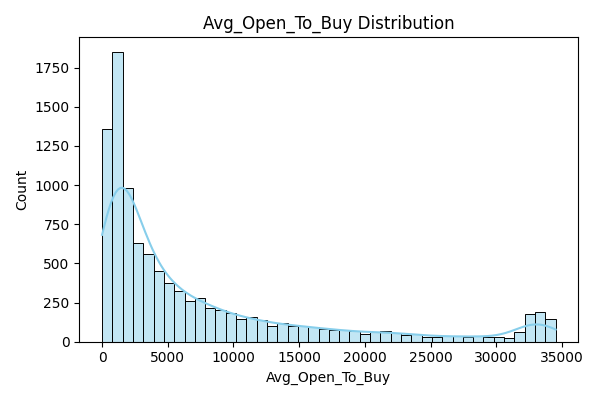

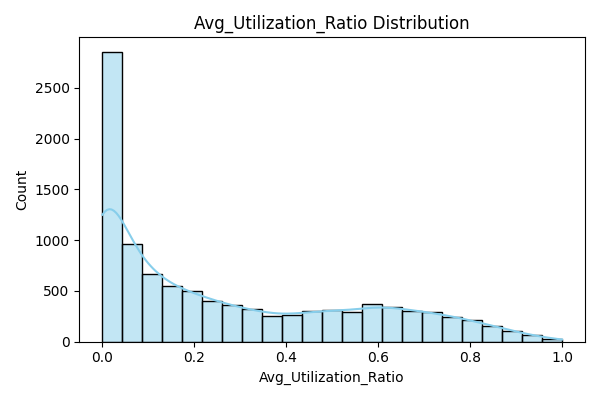

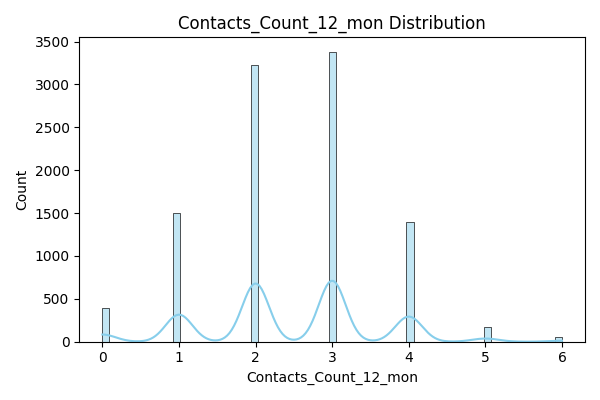

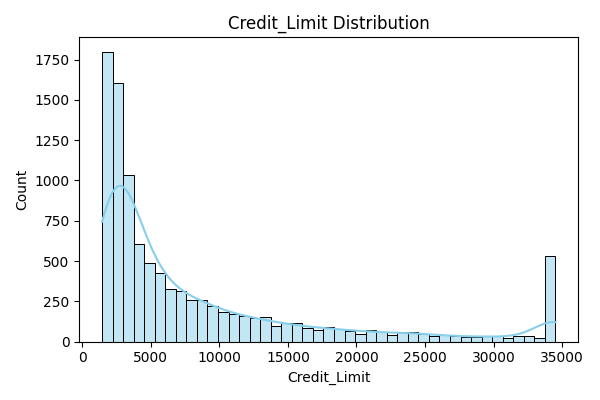

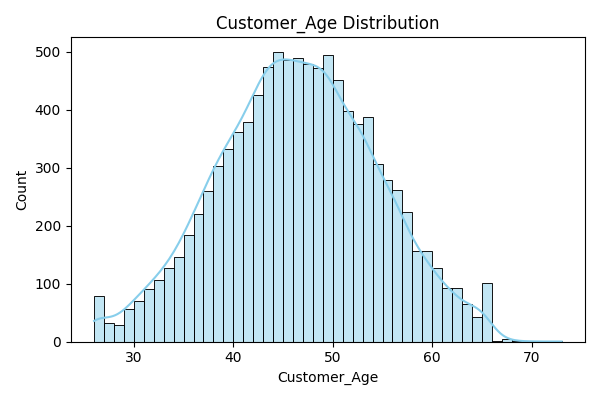

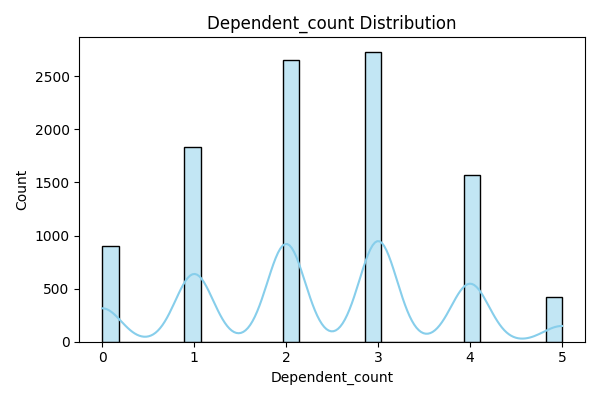

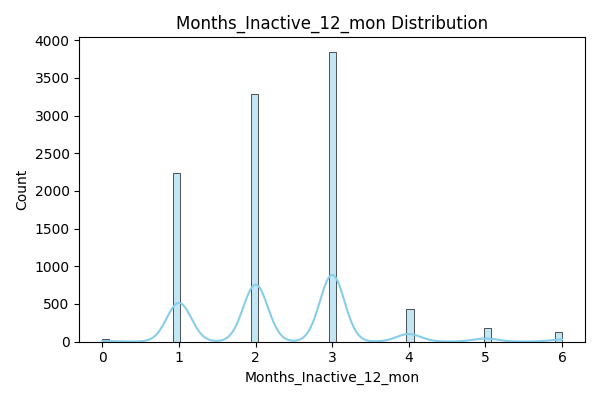

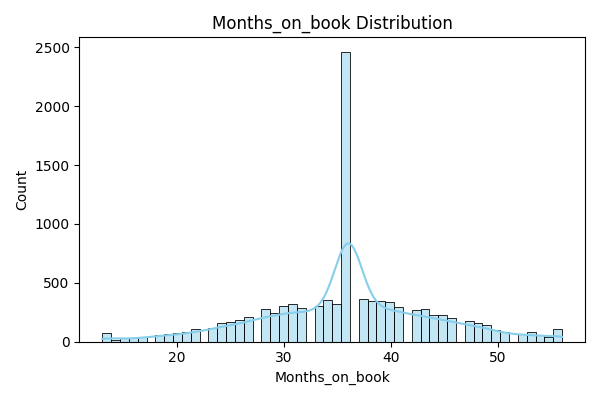

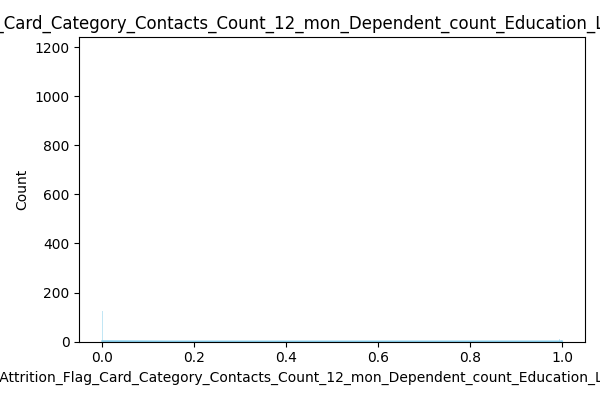

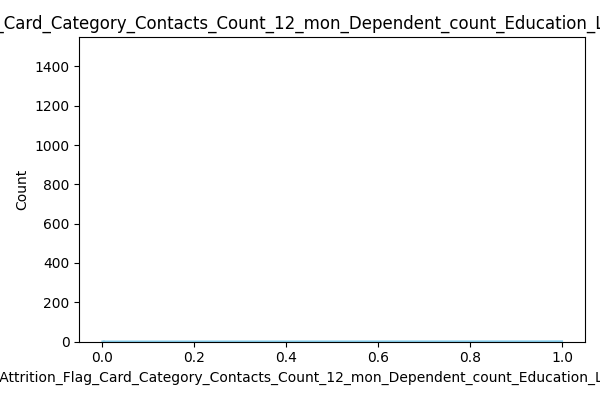

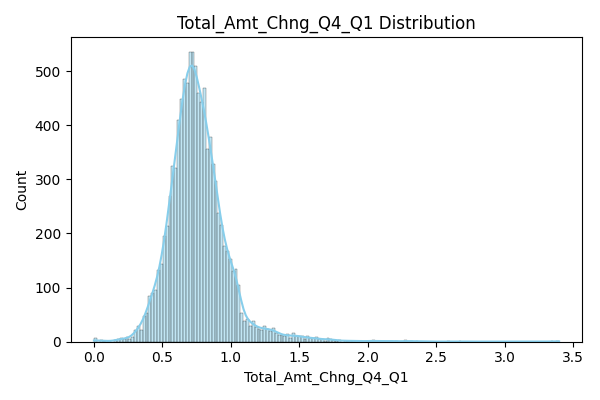

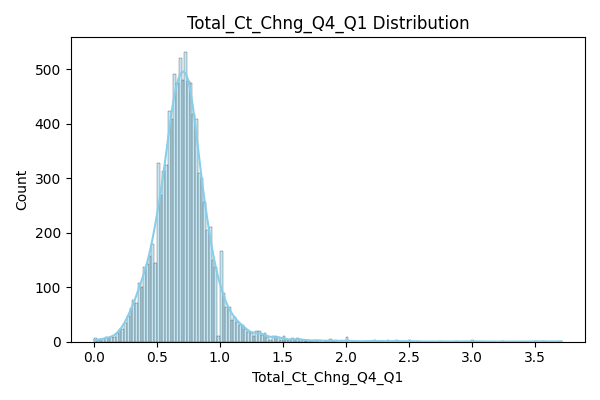

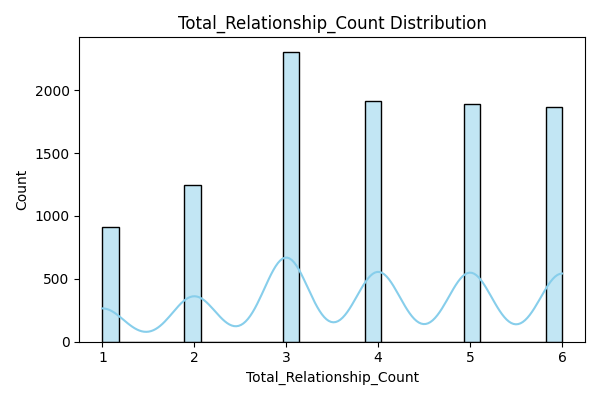

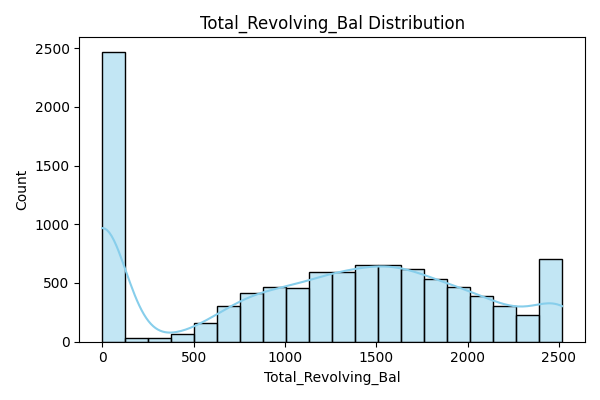

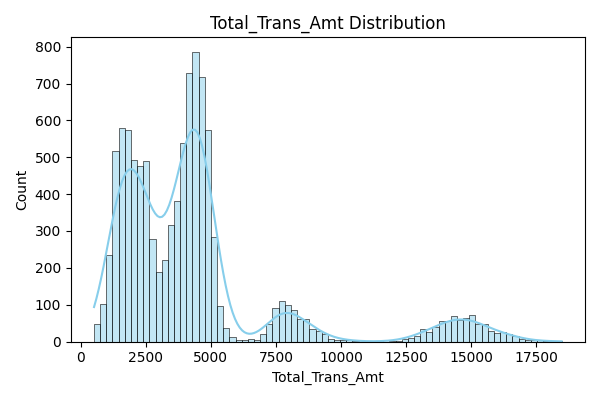

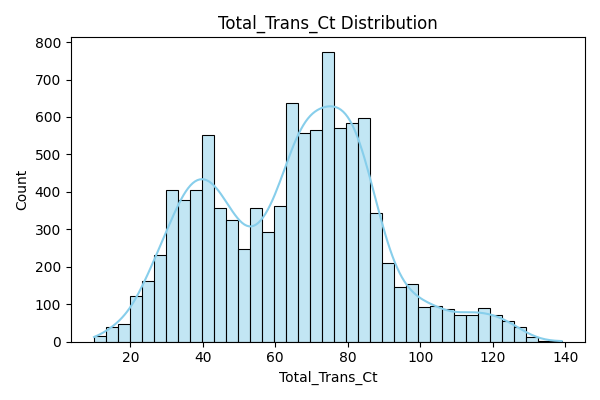

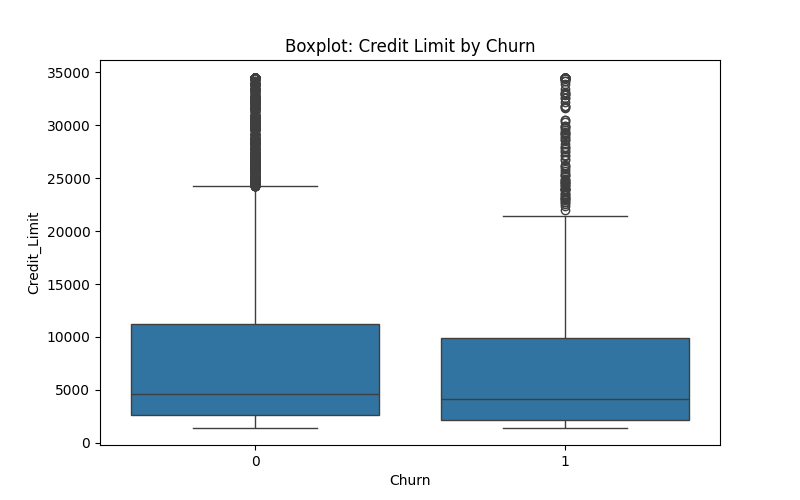

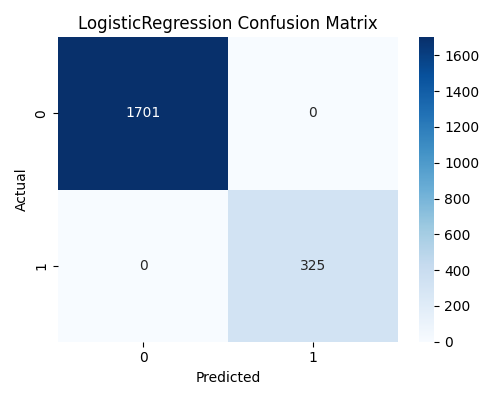

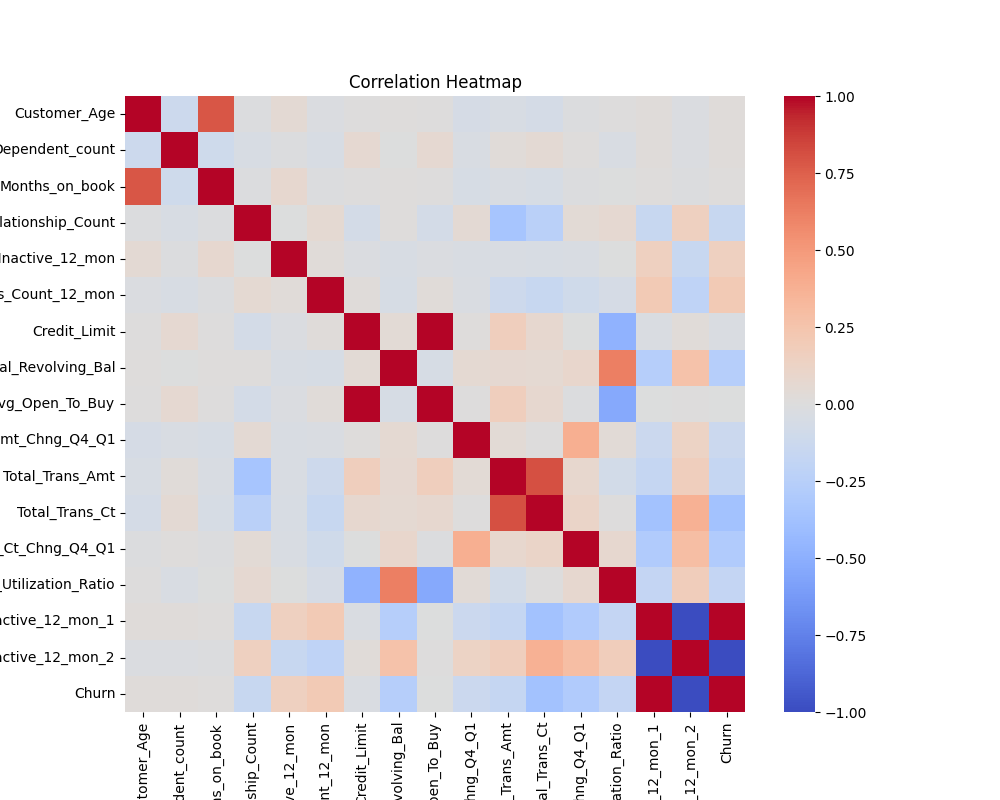

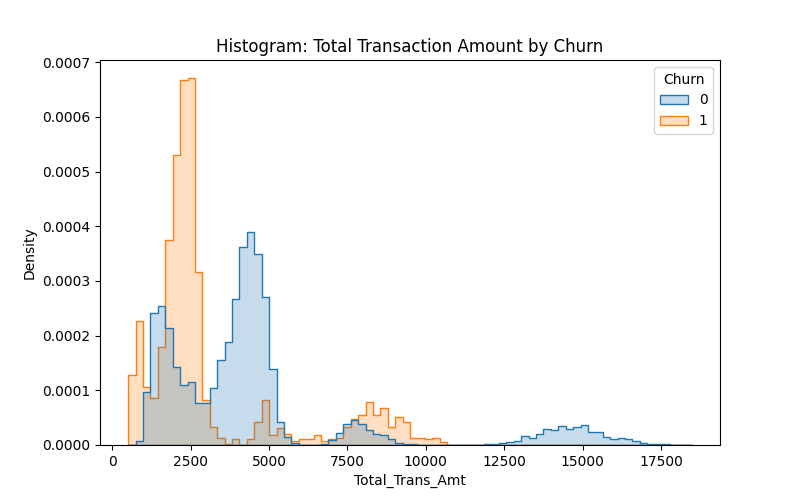

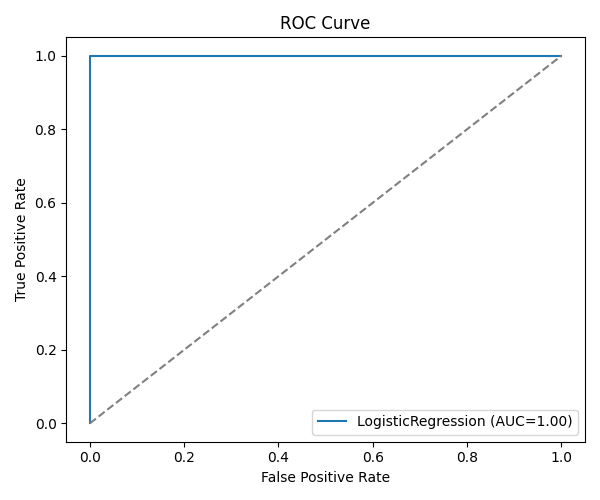

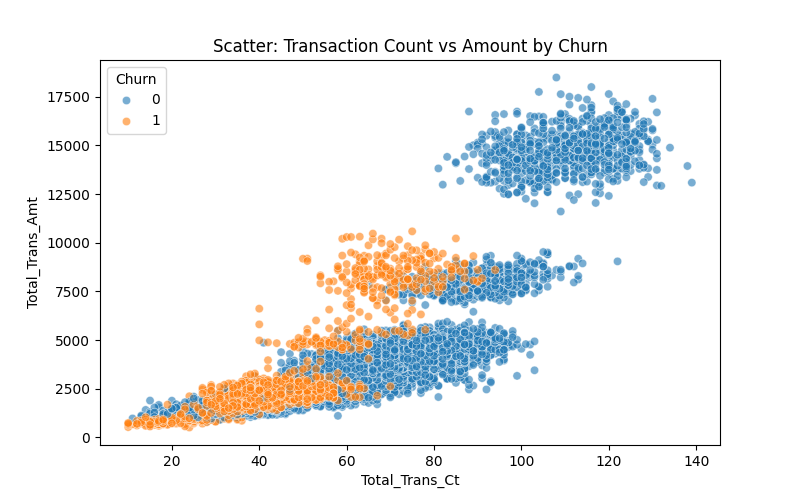

In [3]:
# Ensure the output directory exists
import os
import glob
from IPython.display import display, Markdown, Image

os.makedirs(OUTPUT_DIR, exist_ok=True)

# Define the path to your input CSV file
input_csv = "BankChurners.csv"

# Ask the agent with streaming enabled to see every step, code, and error
with agent:
    stream = agent.run(
        system_prompt,
        additional_args={"input_csv": input_csv},
        max_steps=20,
        stream=True,
    )

# Iterate over the stream and print all chunks
try:
    for chunk in stream:
        # If chunk has content delta, print it
        if hasattr(chunk, 'choices'):
            delta = chunk.choices[0].delta
            content = delta.get('content') or ''
            print(content, end='')
        else:
            # Print any other step info or errors
            print(chunk)
except Exception:
    import traceback; traceback.print_exc()

# After completion, display any generated plot images inline
for img_path in sorted(glob.glob(os.path.join(OUTPUT_DIR, "*.*"))):
    if img_path.lower().endswith((".png", ".jpg", ".jpeg")):
        display(Image(filename=img_path))